This method, I will try to apply thresholding method and utilize the relative diameter to detect the type of coin. 4
The steps will :


1.   import image
2.   gray scale
3.   filter
4.   threshold
5.   detect edges and circle around
6.   count the number of coins
7.   detect and measure diameter
8.   Define which diameter belongs to what type of euro coin
9.   loop 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in ushort_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: overflow encountered in ushort_scalars


2euro


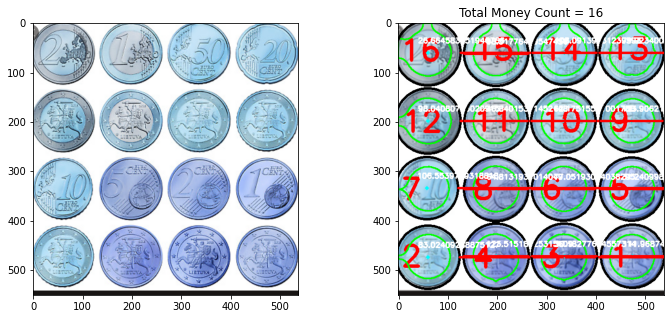

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import math

from matplotlib.offsetbox import AnchoredText



img = cv2.imread('coins.png')            # importing image 
gray = cv2.imread('coins.png', cv2.IMREAD_GRAYSCALE)   #grayscale
gray = cv2.GaussianBlur(gray, (5, 5), 0) # low pass filter b4 downsample
img = cv2.GaussianBlur(img, (5, 5), 0) # low pass filter b4 downsample      # this implimantation is needed to reduce the size of this image, so that program can run faster
                                      #copy of the downsampled img
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)               #to grayscale
gray = cv2.medianBlur(gray, 5)                             #blured
val ,thresh = cv2.threshold(gray,240,255,cv2.THRESH_BINARY_INV) #taking threshold
kernel = np.ones((1,1),np.uint8)                  #matrix
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel) #applying matrix
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, prev_image =  cv2.threshold(dist_transform, 0.3*dist_transform.max(),255,0)
prev_image = np.uint8(prev_image)    #converting array type to float32 then back tp
cnts = cv2.findContours(prev_image.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE) #defining contours
cnts = imutils.grab_contours(cnts)  
apply = img.copy()   
circles = cv2.HoughCircles(thresh, cv2.HOUGH_GRADIENT, 1, 120,param1=100, param2=30, minRadius=0, maxRadius=0)   #parameters 1 to 120 managed to detect the centers
detected_circles = np.uint16(np.around(circles)) 
def show(img,count,cmap="gray"):                  #creating function to so that it can be applied to other images
    f_image = cv2.imread("coins.png")
    f, axs = plt.subplots(1,2,figsize=(12,5))
    axs[0].imshow(f_image,cmap="gray")
    axs[1].imshow(img,cmap="gray")
    axs[1].set_title("Total Money Count = {}".format(count))
for (i, c) in enumerate(cnts):          #counting number of circles 
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(apply, "{}".format(i + 1), (int(x) - 45, int(y)+20), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 5)
	cv2.drawContours(apply, [c], -1, (0, 255, 0), 2)
for (x, y ,r) in detected_circles[0, :]:              #finding the center with respect to outer circle
    cv2.circle(apply, (x, y), r, (0, 0, 0), 3)        #outer
    cv2.circle(apply, (x, y), 2, (0, 255, 255), 3)    #center
    cv2.line(apply,(x-r,y),(x+r, y),(255,0,0),3)
    dist = math.sqrt(((x-r)*(x+r))+(y*y))
    radius=dist/2
    cv2.putText(apply,str(radius),(x-20,y-20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)    
 
    
if radius > 100 and radius <120:
  print("2euro")
elif radius >20 and radius < 30:
  print("10cent")
elif radius >30 and radius < 40:
  print("20cent")
elif radius >50 and radius < 90:
  print("50cent")
else :
  print("1euro")


show(apply,len(cnts))

This failed badly. 
I tried to apply the logic for radius, but my radius seems to be saved as a single constant value (first value of radius in the for loop).
The code does count the number of coins to an extend (depending on the picture), it can aslo draw a radius with the distance (pixel  distance). 
It has failed to count the coins.... 

Here is some trys with other pictures..

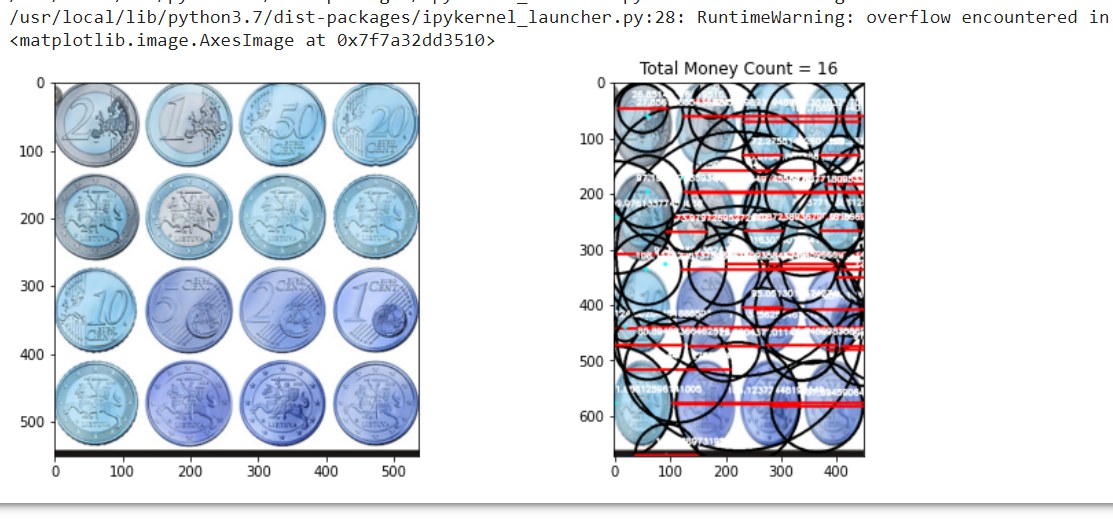

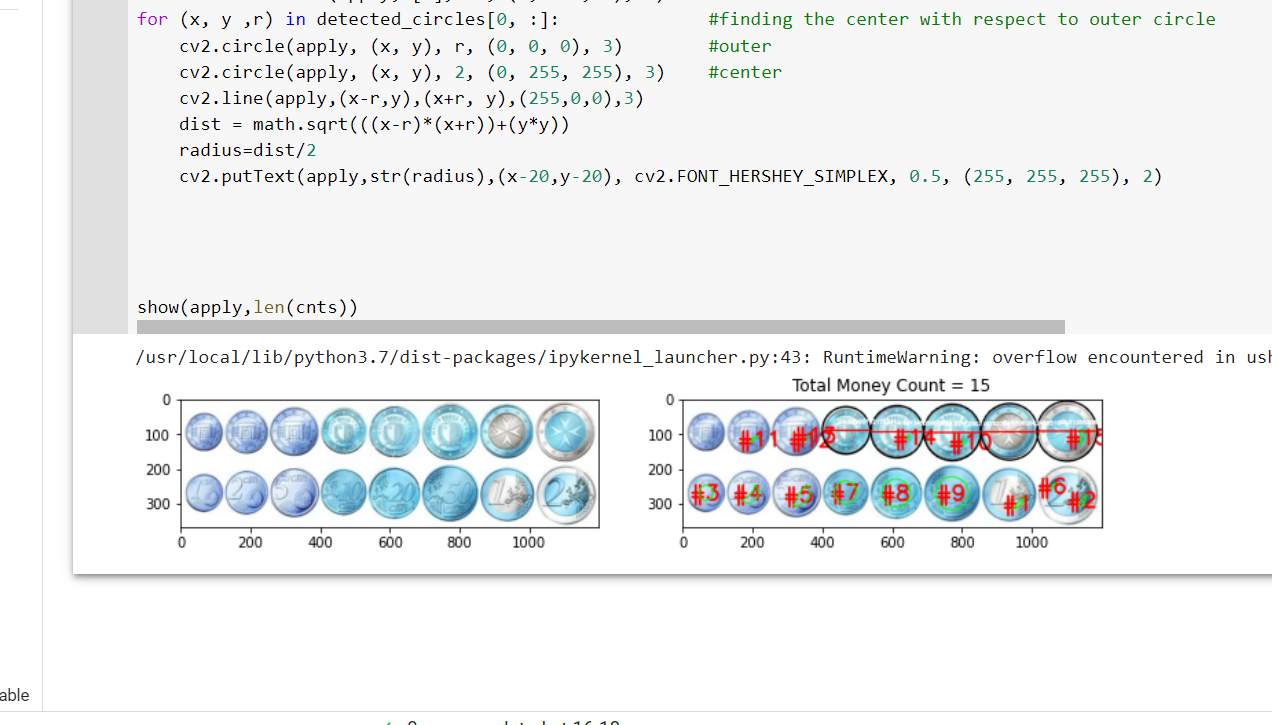

And that was the last failure..